<div style="background-color: olive; padding: 10px; font-size: 60px; color: gold; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5); line-height: 1.2;">

  <strong style="font-size: 50px;">Walmart's Goldmine of Predictions</strong>

</div>


## Project Overview / Goal:    

In [1]:
# Import necessary libraries and modules
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Custom module for data wrangling
import wrangle as w

# Data visualization libraries
import matplotlib.pyplot as plt  # For creating plots and charts
import seaborn as sns  # For improved data visualization

# Statistical and time series analysis modules
import statsmodels.api as sm  # For statistical modeling
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Time series forecasting models
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Holt-Winters Exponential Smoothing
from statsmodels.tsa.arima.model import ARIMA  # Autoregressive Integrated Moving Average (ARIMA) model


<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - <strong style="font-size: 18px; background-color: orange;">PLAN</strong> --- Acquire --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


Initial Questions
 - What is the main objective of this project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 - Which features (variables) will be used as predictors in the models?
 - How can we use time series in this project?
 - What types of machine learning models are suitable for the problem? 

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- <strong style="font-size: 18px; background-color: orange;">ACQUIRE & PREPARE</strong> --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


-   The acquire_retail function in wrangle module acquires data 
from 'https://data.world/ahmedmnif150/walmart-retail-dataset/workspace/file?filename=Walmart-Retail-Dataset.csv' 

- After cleaning the dataset comprises of 978393 rows and 23 columns.

- Each observation in the Walmart dataset represents a specific transaction or sale within Walmart's retail operations, including details such as items purchased, prices, dates, and store locations.


| Column Name          | Non-Null Count | Data Type         | Definition                                     |
|----------------------|----------------|-------------------|-----------------------------------------------|
| city                 | 978,393        | object            | City name where the order was placed          |
| customer_age         | 978,393        | int64             | Age of the customer                           |
| customer_name        | 978,393        | object            | Name of the customer                          |
| customer_segment     | 978,393        | object            | Customer segment or category                  |
| discount             | 978,393        | float64           | Discount applied to the order                 |
| order_date           | 978,393        | datetime64[ns]    | Date when the order was placed                |
| order_id             | 978,393        | object            | Unique identifier for the order               |
| order_priority       | 978,393        | category          | Priority of the order (e.g., high, medium)    |
| order_quantity       | 978,393        | int64             | Quantity of products in the order             |
| product_base_margin  | 978,393        | float64           | Profit margin of the product                  |
| product_category     | 978,393        | category          | Category of the product (e.g., electronics)   |
| product_container    | 978,393        | category          | Type of container for shipping                |
| product_name         | 978,393        | category          | Name of the product                           |
| product_sub_category | 978,393        | category          | Sub-category of the product                   |
| profit               | 978,393        | float64           | Profit from the order                         |
| region               | 978,393        | category          | Region where the order was placed             |
| sales                | 978,393        | float64           | Total sales amount                            |
| ship_date            | 978,393        | datetime64[ns]    | Date when the order was shipped               |
| ship_mode            | 978,393        | category          | Shipping mode (e.g., express, standard)       |
| shipping_cost        | 978,393        | float64           | Cost of shipping the order                    |
| state                | 978,393        | category          | State or region where the order was placed    |
| unit_price           | 978,393        | float64           | Price per unit of the product                |
| zip_code             | 978,393        | category          | ZIP code associated with the order            |



In [2]:

# Download the dataset 
# from https://data.world/ahmedmnif150/walmart-retail-dataset/workspace/file?filename=Walmart-Retail-Dataset.csv
# and name it Walmart-Retail-Dataset-new.csv before running this function

# Specify the path to the CSV file
csv_file_path = 'Walmart-Retail-Dataset-new.csv'

# Call the function to acquire retail data from the CSV file
df_retail = w.acquire_retail(csv_file_path)

In [3]:
# print summary statistics
w.summarize(df_retail )

Shape of Data: 
(999998, 29)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999998 entries, 0 to 999997
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   city                  999991 non-null  object
 1   customer_age          999998 non-null  object
 2   customer_name         999985 non-null  object
 3   customer_segment      997500 non-null  object
 4   discount              999998 non-null  object
 5   order_date            999998 non-null  object
 6   order_id              999998 non-null  object
 7   order_priority        997942 non-null  object
 8   order_quantity        999998 non-null  object
 9   product_base_margin   999998 non-null  object
 10  product_category      999998 non-null  object
 11  product_container     995432 non-null  object
 12  product_name          995421 non-null  object
 13  product_sub_category  995432 non-null  object
 14  profit                995432 non

In [3]:
# Call the function to prepare the retail data
df_retail = w.prepare_retail_data(df_retail)


### After handling missing values, always validate the cleaned dataset to ensure it meets the requirements of the analysis or modeling tasks

In [4]:
# print summary statistics
w.summarize(df_retail )

Shape of Data: 
(978393, 23)
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 978393 entries, 0 to 999997
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city                  978393 non-null  object        
 1   customer_age          978393 non-null  int64         
 2   customer_name         978393 non-null  object        
 3   customer_segment      978393 non-null  object        
 4   discount              978393 non-null  float64       
 5   order_date            978393 non-null  datetime64[ns]
 6   order_id              978393 non-null  object        
 7   order_priority        978393 non-null  category      
 8   order_quantity        978393 non-null  int64         
 9   product_base_margin   978393 non-null  float64       
 10  product_category      978393 non-null  category      
 11  product_container     978393 non-null  category      
 12  product_name          97839

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- <strong style="font-size: 18px; background-color: orange;">EXPLORE</strong> --- Model --- Deliver
    </div>
</div>

For time series data, it's generally a good practice to use the entire dataset for exploration to understand the temporal patterns and trends in the data.

In [4]:
    # Sort and reset the index by 'order_date'
    df_retail = w.sort_and_reset_index(df_retail, 'order_date')

    # Check if the 'order_date' column is now sorted chronologically
    is_timestamp_sorted = df_retail['order_date'].is_monotonic_increasing
    print(f"Is the 'order_date' column sorted chronologically? {is_timestamp_sorted}")


Is the 'order_date' column sorted chronologically? True


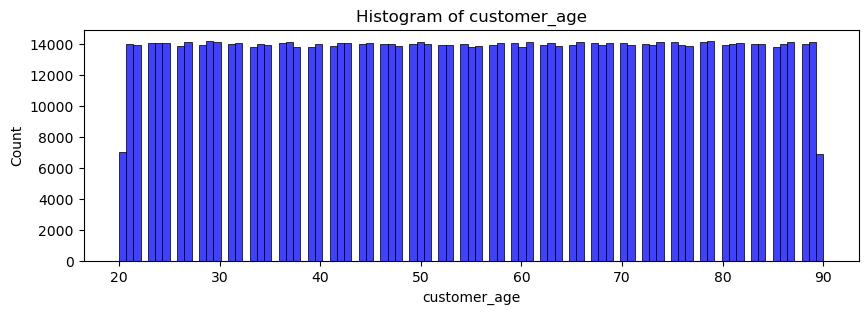

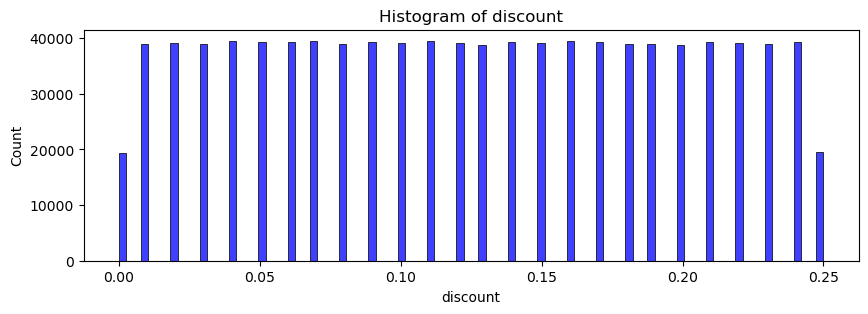

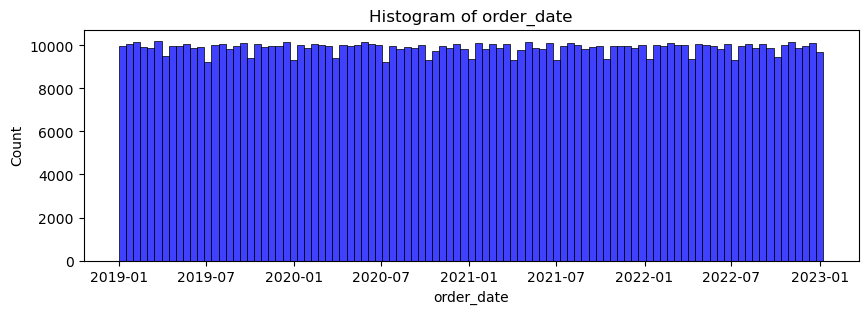

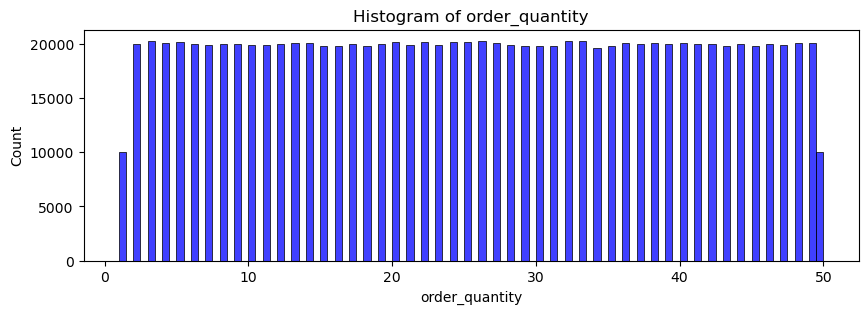

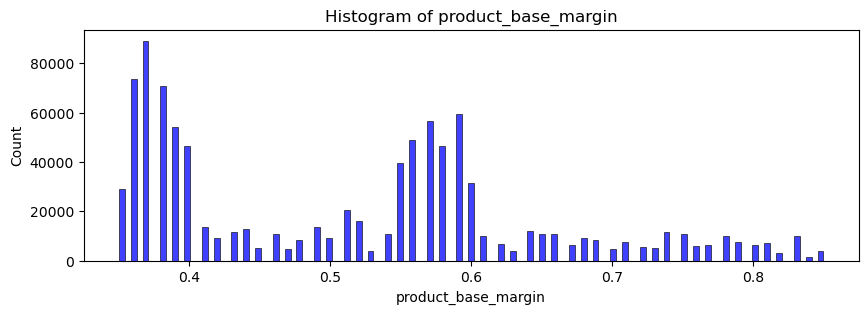

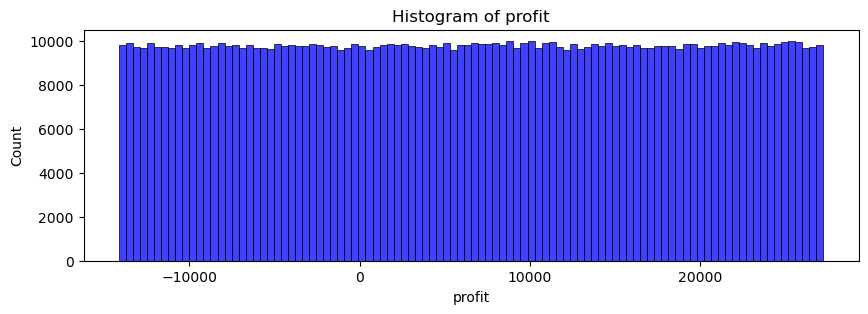

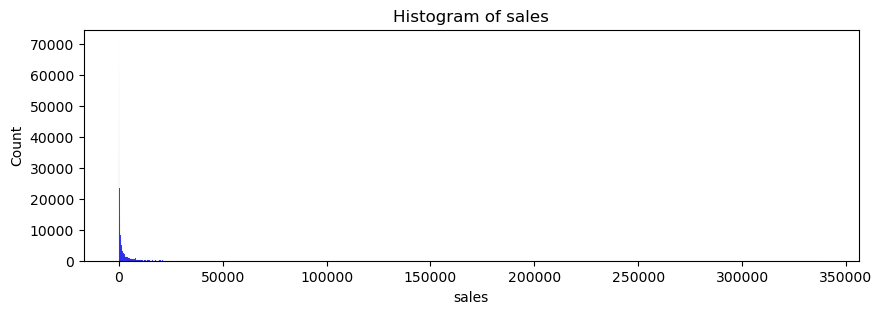

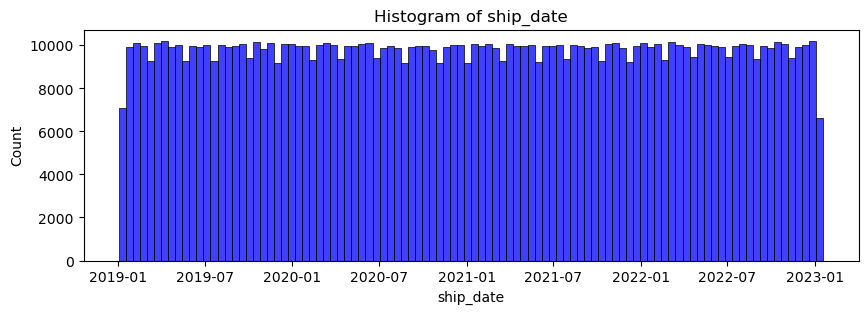

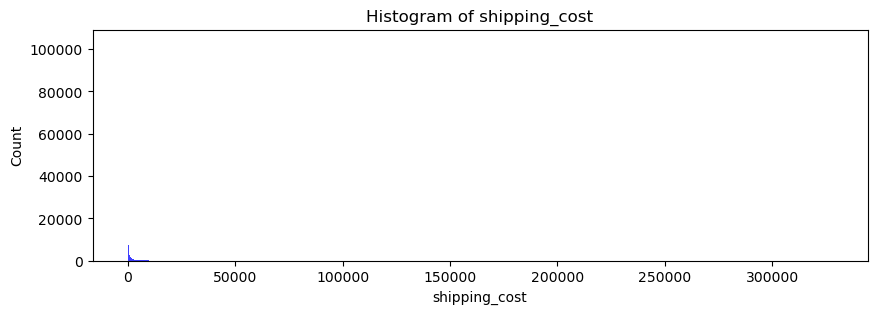

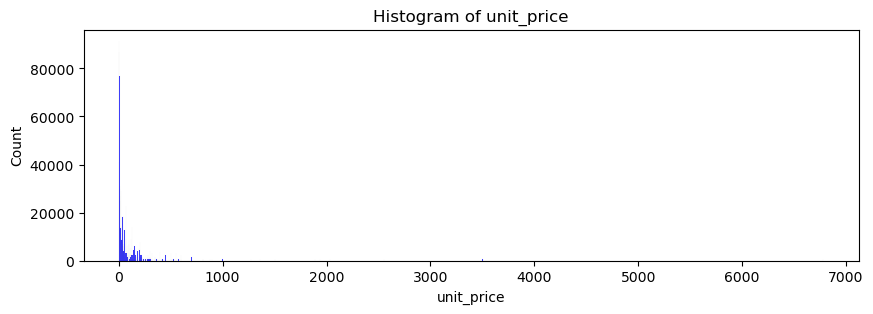

In [5]:
# Retail data histograms
w.display_numeric_column_histograms(df_retail)

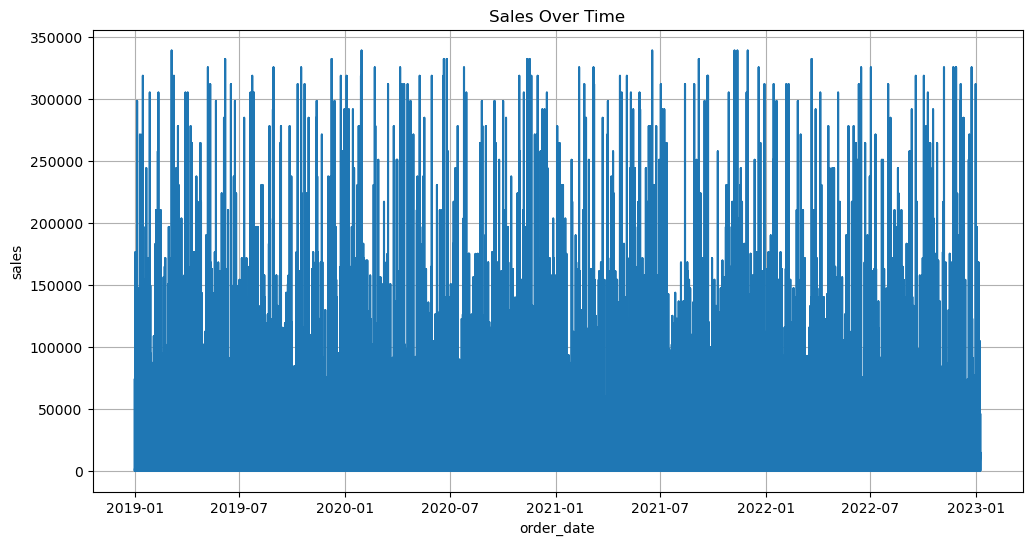

In [5]:
# Call the function to plot a single y-column against the x-column 
# plot_time_series(df, 'date_column', 'value_column', 'Time Series Plot'

w.plot_time_series(df_retail, 'order_date', 'sales', 'Sales Over Time')

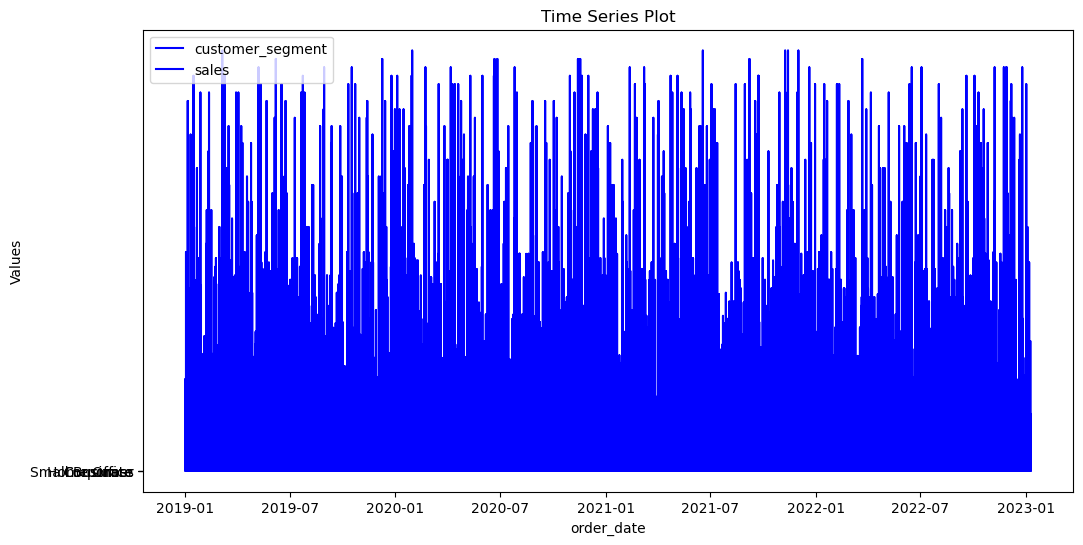

In [7]:
# Call the function that handle multiple y-columns 
w.plot_time_series_multi(df_retail, 'order_date', ['customer_segment', 'sales'], 'Time Series Plot')


## Split

In [ ]:
After understanding the data, perform the train-test split

### sorting the DataFrame by 'order_date' and using a fixed split proportion for time series analysis


In [4]:
    # Checking again before splitting if the dates are sorted chronologically
    # Sort and reset the index by 'order_date'
    df_retail = w.sort_and_reset_index(df_retail, 'order_date')

    # Check if the 'order_date' column is now sorted chronologically
    is_timestamp_sorted = df_retail['order_date'].is_monotonic_increasing
    print(f"Is the 'order_date' column sorted chronologically? {is_timestamp_sorted}")


Is the 'order_date' column sorted chronologically? True


In [5]:
# Perform the train-test split with a specified training proportion

train_data, test_data = w.train_test_split_proportion(df_retail, train_proportion=0.8)
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Train data shape: (782714, 23)
Test data shape: (195679, 23)


In [27]:
# print summary statistics 
w.summarize(train_data)

Shape of Data: 
(782714, 23)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782714 entries, 0 to 782713
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city                  782714 non-null  object        
 1   customer_age          782714 non-null  int64         
 2   customer_name         782714 non-null  object        
 3   customer_segment      782714 non-null  object        
 4   discount              782714 non-null  float64       
 5   order_date            782714 non-null  datetime64[ns]
 6   order_id              782714 non-null  object        
 7   order_priority        782714 non-null  category      
 8   order_quantity        782714 non-null  int64         
 9   product_base_margin   782714 non-null  float64       
 10  product_category      782714 non-null  category      
 11  product_container     782714 non-null  category      
 12  product_name          

### The time period covered by the dataset January 1, 2019, to January 9, 2023

### Initial questions to explore:


Sales Forecasting:

  1. What is the overall trend in sales over time?
  2. Are there any seasonal patterns or cycles in sales data?
  3. Can we forecast future sales based on historical data?
  4. How do sales patterns vary across different customer segments over time?
  5. Is there a relationship between the order quantity and the order date? Are there any specific trends or patterns in order quantities over time?

## 1. What is the overall trend in sales over time?

The original code plotted the sales data for each individual day, which can result in a large number of data points, causing the OverflowError.To address this,resampled the daily sales data to a lower frequency, such as monthly ('M').

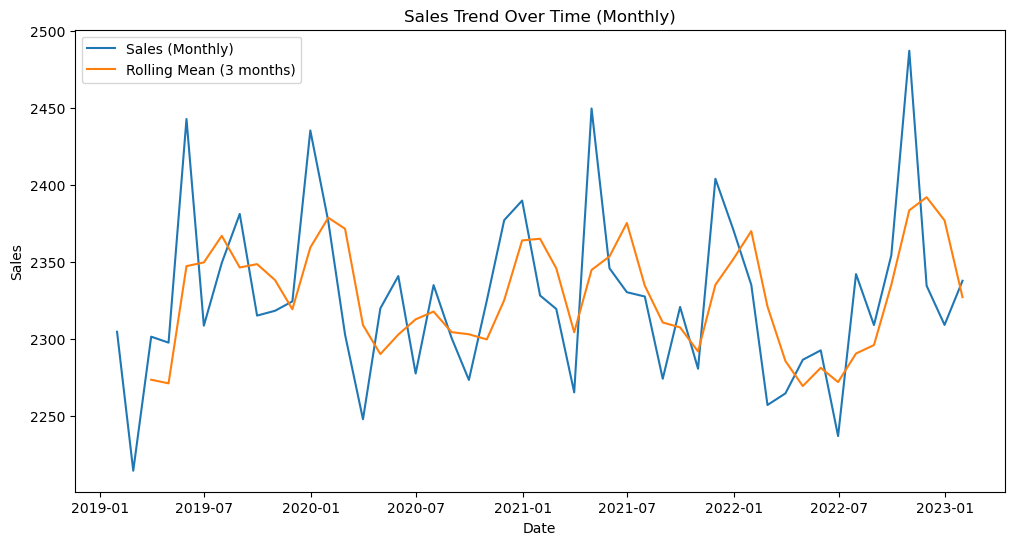

In [9]:
# Set 'order_date' as the datetime index
df_retail.set_index('order_date', inplace=True)

# Resample the time series data to a lower frequency (e.g., monthly)
resampled_data = df_retail['sales'].resample('M').mean()

# Calculate rolling mean to smooth the resampled data and visualize the trend
rolling_mean = resampled_data.rolling(window=3).mean()

# Plot the resampled data and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data, label='Sales (Monthly)')
plt.plot(resampled_data.index, rolling_mean, label='Rolling Mean (3 months)')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Takeaways for questions 1:

    The consistency of these patterns in both the rolling mean and Sales Monthly data suggests that these fluctuations are not random but may be influenced by external factors or events that occur seasonally or cyclically.
     
     There are distinct periods of increase and decrease in the rolling mean (3 months)[provides a smoothed view of sales trends] and Sales (Monthly) of sales over time.
     

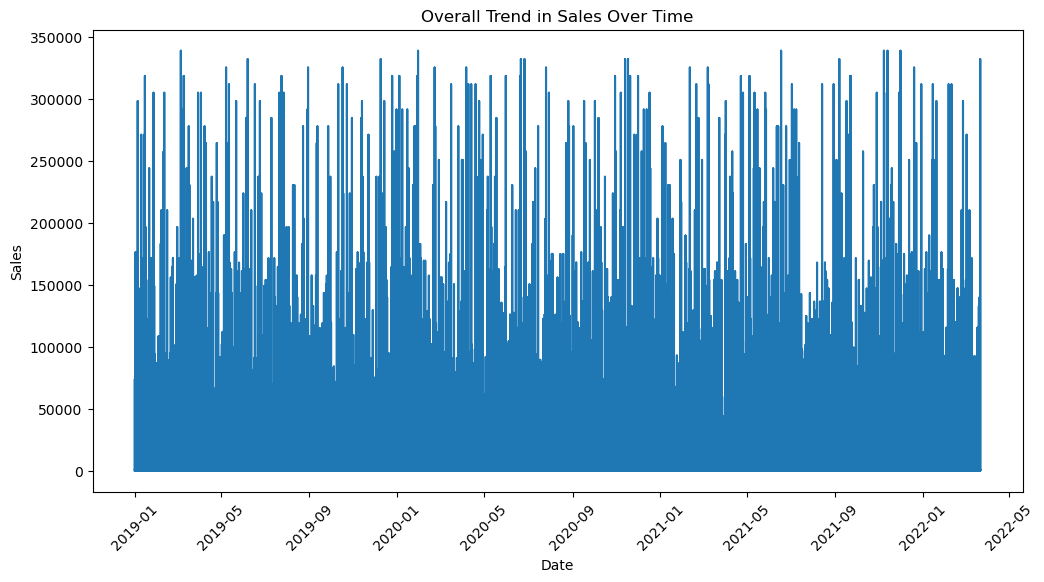

In [29]:
#Time Series Analysis and Forecasting Using Prophet with Actual Sales Data

# Load the actual sales data into a DataFrame
df_actual = pd.read_csv('actual_sales_data_train.csv')

# 'date' column, set it as the index for time-based analysis
df_actual['ds'] = pd.to_datetime(df_actual['ds'])
df_actual.set_index('ds', inplace=True)

# Plotting the overall trend in sales over time
plt.figure(figsize=(12, 6))
plt.plot(df_actual.index, df_actual['y'])
plt.title('Overall Trend in Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


# 2. Are there any seasonal patterns or cycles in sales data?


In [10]:

# Sales decomposition by week

y = df_retail.sales.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
order_date,,,,
2019-01-06,2238.187125,NaN,0.159044,NaN
2019-01-13,2292.286243,NaN,14.188155,NaN
2019-01-20,2363.444349,NaN,40.365249,NaN
2019-01-27,2275.704504,NaN,57.945080,NaN
2019-02-03,2258.313376,NaN,54.880599,NaN


Takeaways for question 2:

    - The presence of non-null values in the "seasonal" column suggests that there is a seasonal component in the data, indicating that sales exhibit recurring patterns or cycles over time.
    
    - The absence of values in the "trend" column implies that there is no clear linear trend in the sales data during this period. Seasonal patterns appear to be the dominant factor influencing sales fluctuations. 

#  3. Can we forecast future sales based on historical data?

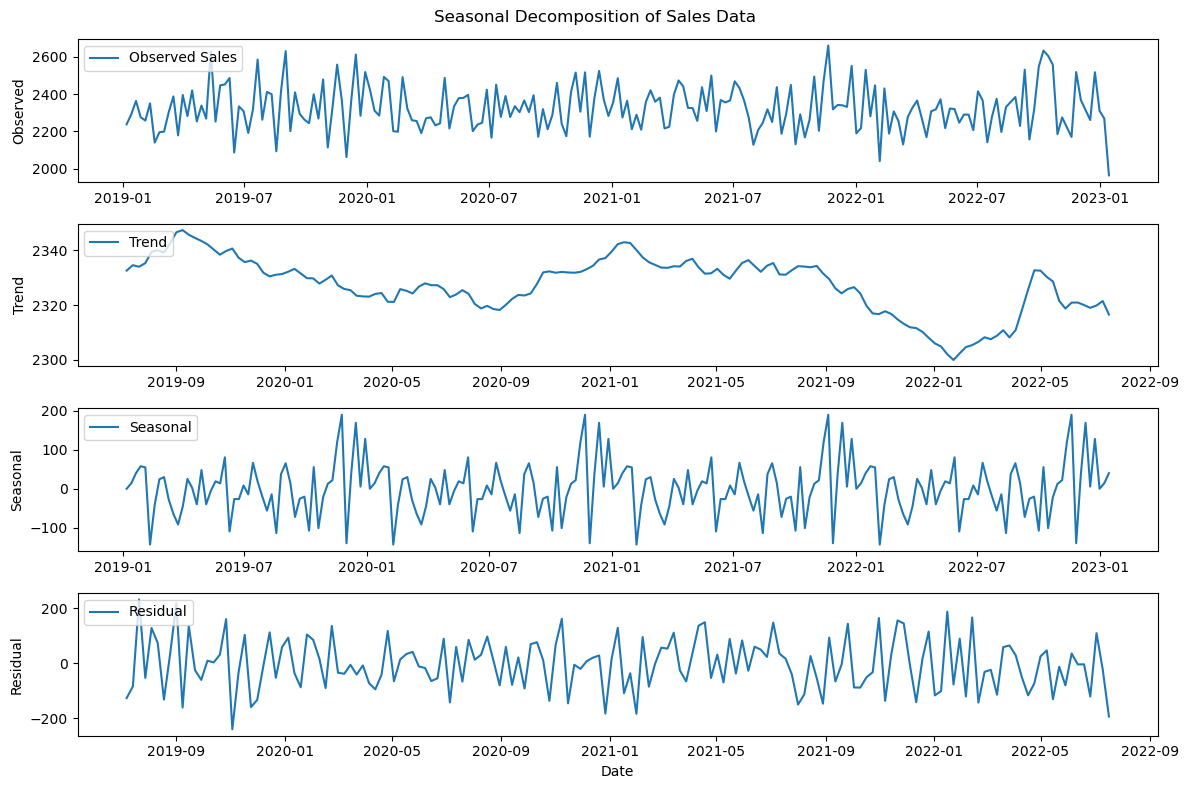

In [40]:
# Visualize the results for weekly
import matplotlib.pyplot as plt

# Create subplots for observed, trend, seasonal, and residual components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

# Plot the observed sales data
ax1.plot(y.index, result.observed, label='Observed Sales')
ax1.set_ylabel('Observed')
ax1.legend(loc='upper left')

# Plot the trend component
ax2.plot(y.index, result.trend, label='Trend')
ax2.set_ylabel('Trend')
ax2.legend(loc='upper left')

# Plot the seasonal component
ax3.plot(y.index, result.seasonal, label='Seasonal')
ax3.set_ylabel('Seasonal')
ax3.legend(loc='upper left')

# Plot the residual component
ax4.plot(y.index, result.resid, label='Residual')
ax4.set_ylabel('Residual')
ax4.legend(loc='upper left')

plt.xlabel('Date')
plt.suptitle('Seasonal Decomposition of Sales Data')
plt.tight_layout()
plt.show()


In [41]:

# Sales decomposition by monthly

y = df_retail.sales.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
order_date,,,,
2019-01-31,2304.478295,NaN,24.816291,NaN
2019-02-28,2214.249834,NaN,-27.533562,NaN
2019-03-31,2301.303242,NaN,-60.952976,NaN
2019-04-30,2297.414723,NaN,28.886268,NaN
2019-05-31,2442.658162,NaN,0.850526,NaN


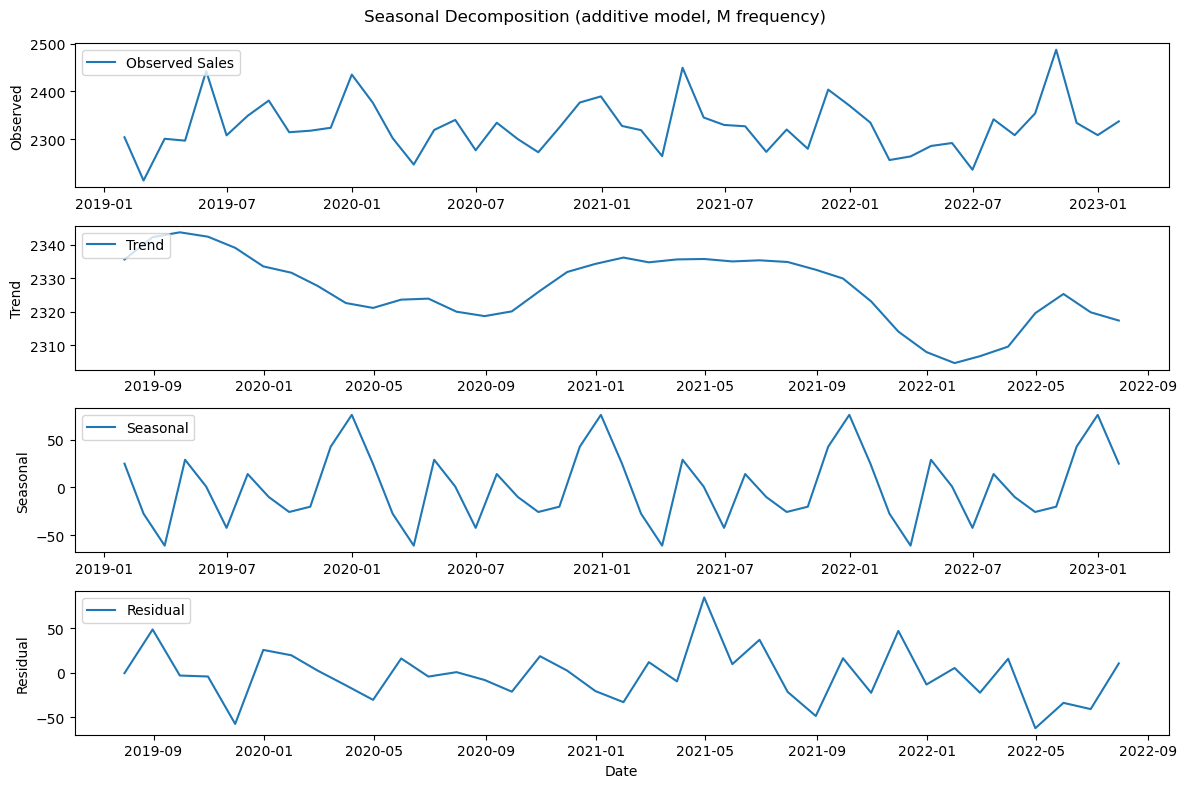

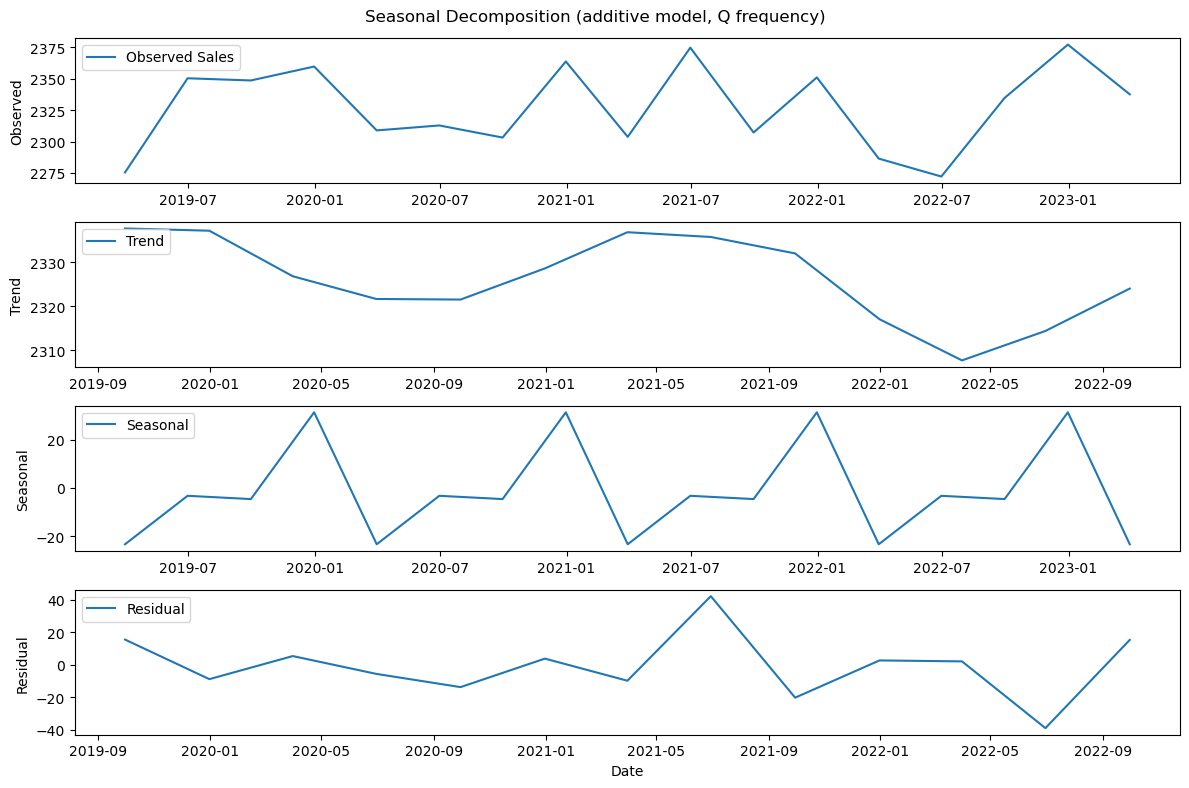

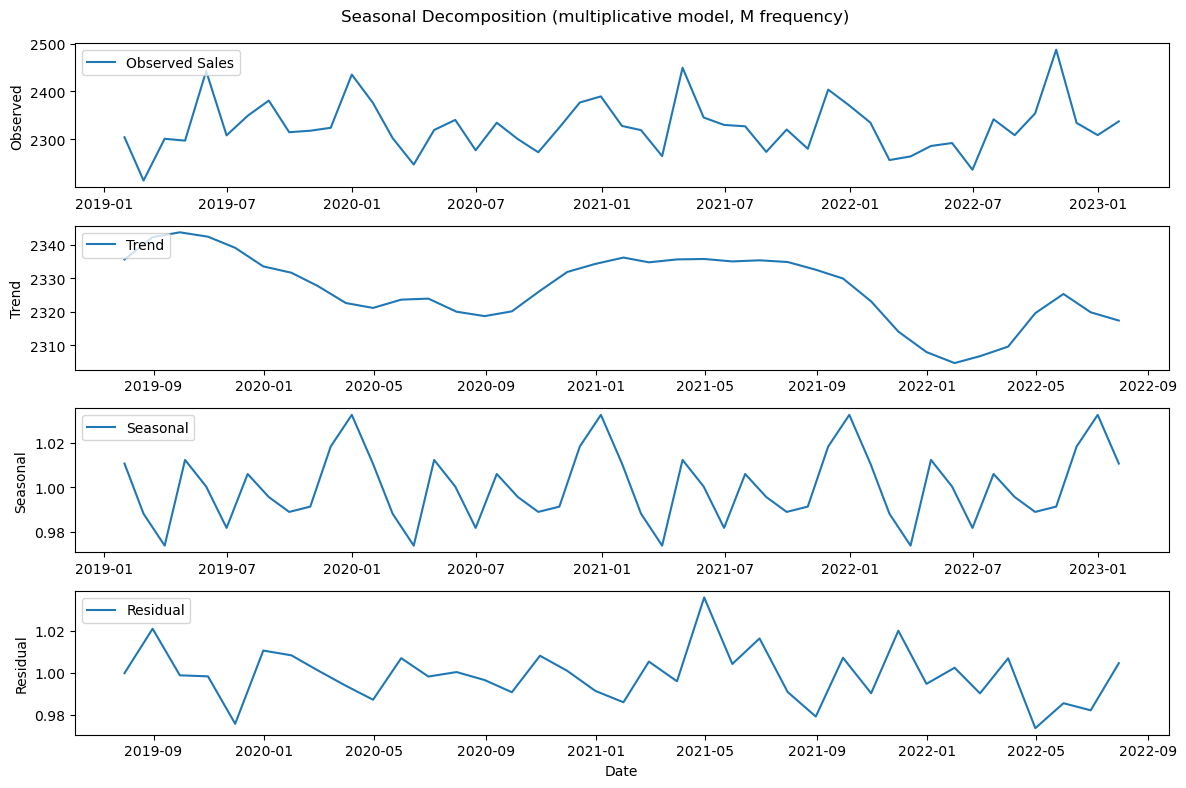

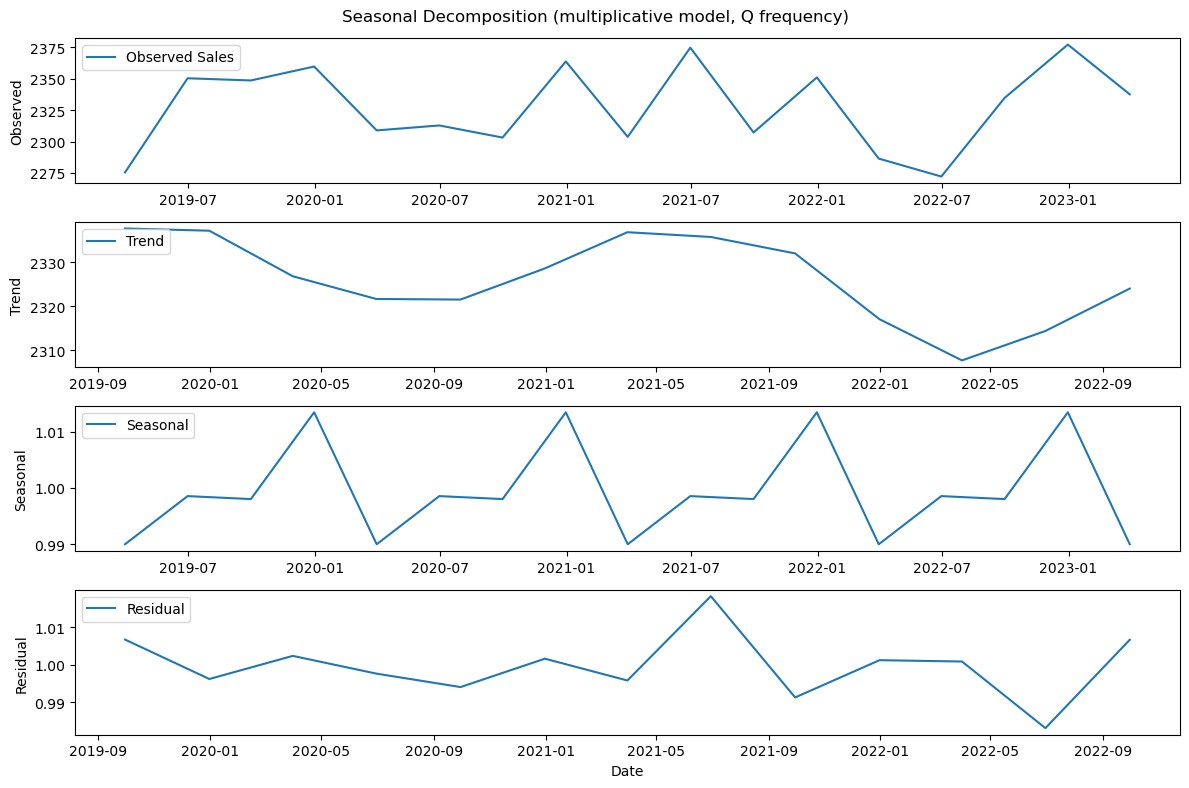

In [42]:
#Try different decomposition models

# Create a function for seasonal decomposition
def perform_seasonal_decomposition(data, freq, model):
    y = data.sales.resample(freq).mean()
    result = sm.tsa.seasonal_decompose(y, model=model)
    return result

# List of decomposition models and frequencies to try
models = ['additive', 'multiplicative']
frequencies = ['M', 'Q']

# Iterate over decomposition models and frequencies
for model in models:
    for freq in frequencies:
        result = perform_seasonal_decomposition(df_retail, freq, model)
        
        # Visualize the results
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
        ax1.plot(result.observed.index, result.observed, label='Observed Sales')
        ax1.set_ylabel('Observed')
        ax1.legend(loc='upper left')
        ax2.plot(result.trend.index, result.trend, label='Trend')
        ax2.set_ylabel('Trend')
        ax2.legend(loc='upper left')
        ax3.plot(result.seasonal.index, result.seasonal, label='Seasonal')
        ax3.set_ylabel('Seasonal')
        ax3.legend(loc='upper left')
        ax4.plot(result.resid.index, result.resid, label='Residual')
        ax4.set_ylabel('Residual')
        ax4.legend(loc='upper left')
        plt.xlabel('Date')
        plt.suptitle(f'Seasonal Decomposition ({model} model, {freq} frequency)')
        plt.tight_layout()
        plt.show()


In [ ]:
# perform data analysis on the downloaded forecast_sales.csv" from prohet model

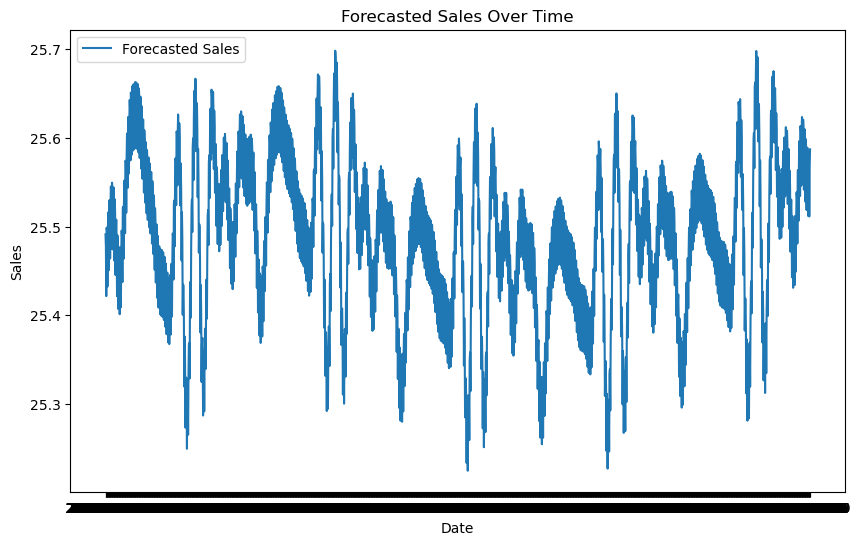

In [14]:

# Load the forecasted data
forecast_data = pd.read_csv('forecast_sales.csv')

# Plot the forecasted sales over time
plt.figure(figsize=(10, 6))
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasted Sales Over Time')
plt.legend()
plt.show()


# Takeaways for question 3:

Yes, we have the capability to predict future sales by analyzing past data. Upon examining the historical data, a distinct pattern emerges, especially during holiday seasons. We have employed the Prophet forecasting method to visualize and analyze these patterns.

#  4. How do sales patterns vary across different customer segments over time?

In [15]:
# perform data analysis on the downloaded segmented_forecast_results.csv" from prohet model


Summary Statistics:
             trend    yhat_lower    yhat_upper  trend_lower  trend_upper  \
count  7340.000000   7340.000000   7340.000000  7340.000000  7340.000000   
mean   2332.838993  -8549.552225  13209.918716  2315.117267  2350.214057   
std      77.981154    511.733674    519.705482    77.287122   111.732621   
min    2116.565284 -10231.042159  11254.126898  1928.392481  2116.565284   
25%    2284.959382  -8897.987641  12848.900659  2282.406597  2294.359482   
50%    2330.490404  -8542.297202  13210.194819  2326.558742  2335.588907   
75%    2367.419637  -8203.322154  13566.326425  2363.711537  2369.667554   
max    2640.408892  -6635.504339  15183.113263  2502.037629  3070.256881   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count     7340.000000           7340.000000           7340.000000   
mean         0.077020              0.077020              0.077020   
std         93.226689             93.226689             93.226689   
min       -267.674

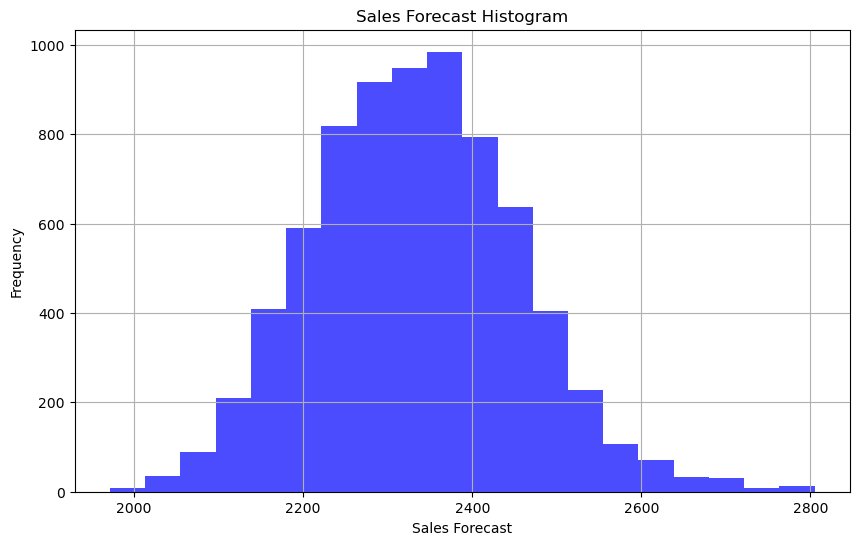

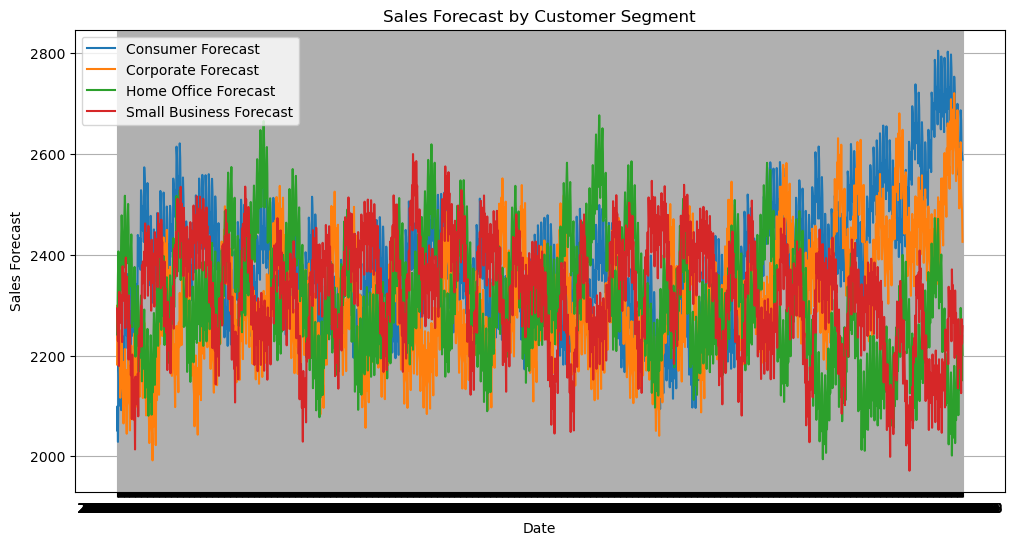

In [12]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('segmented_forecast_results.csv')


# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Calculate and display statistical metrics
# Add more metrics as needed
mean_sales = df['yhat'].mean()
median_sales = df['yhat'].median()
std_dev_sales = df['yhat'].std()

print("\nStatistical Metrics:")
print(f"Mean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales:.2f}")
print(f"Standard Deviation of Sales: {std_dev_sales:.2f}")

# Create visualizations
# Example: Histogram of sales forecast
plt.figure(figsize=(10, 6))
plt.hist(df['yhat'], bins=20, color='blue', alpha=0.7)
plt.title('Sales Forecast Histogram')
plt.xlabel('Sales Forecast')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Example: Time series plot of sales forecast
plt.figure(figsize=(12, 6))
for segment, segment_data in df.groupby('customer_segment'):
    plt.plot(segment_data['ds'], segment_data['yhat'], label=f'{segment} Forecast')

plt.title('Sales Forecast by Customer Segment')
plt.xlabel('Date')
plt.ylabel('Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()



# Takeaways for question 4:

Different sales patterns can be identified among various customer segments. Among these segments, the consumer segment is projected to have the highest sales during the forecast period from January 10, 2023, to January 9, 2024. Following closely is the corporate segment, followed by home office sales, with the lowest sales expected from the small business segment

# 5. Is there a relationship between the order quantity and the order date? Are there any specific trends or patterns in order quantities over time?

In [ ]:
# perform data analysis on the downloaded forecasted_inventory.csv" from prohet model

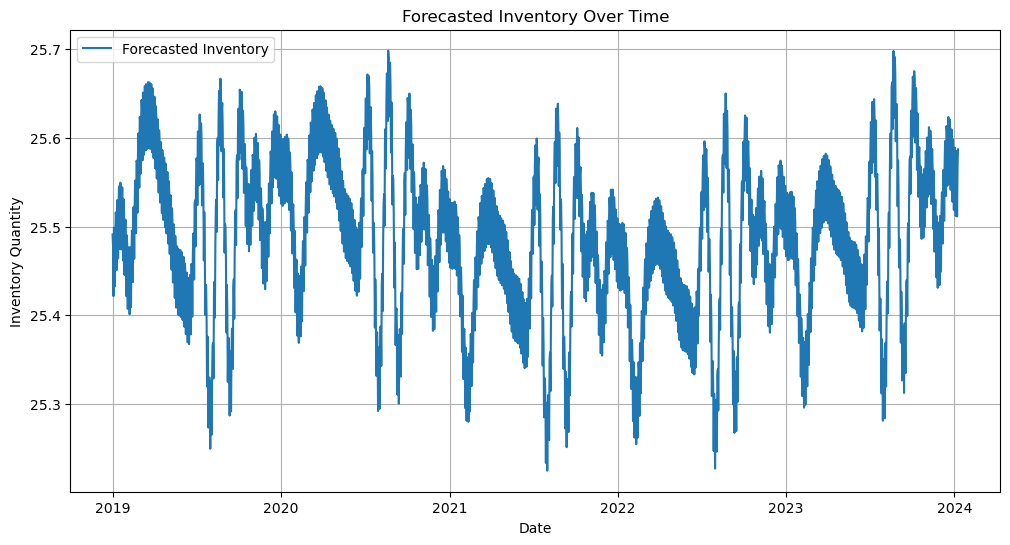

In [13]:

# Load the forecasted inventory data
forecasted_inventory = pd.read_csv('forecasted_inventory.csv') 

# CSV contains columns 'date' and 'inventory_quantity'
date_column = 'ds'
inventory_quantity_column = 'yhat'

# Convert the 'date' column to datetime format if it's not already
forecasted_inventory[date_column] = pd.to_datetime(forecasted_inventory[date_column])

# Create a line plot to visualize the forecasted inventory over time
plt.figure(figsize=(12, 6))
plt.plot(forecasted_inventory[date_column], forecasted_inventory[inventory_quantity_column], label='Forecasted Inventory')
plt.xlabel('Date')
plt.ylabel('Inventory Quantity')
plt.title('Forecasted Inventory Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Takeaways for question 5:

  In summary, the inventory predictions for both 2023 and 2024 reveal seasonal variations that closely align with historical patterns observed in the preceding years (2019-2022)."

"These recurrent patterns offer valuable insights for effective inventory management and strategic planning. They empower businesses to anticipate fluctuations in inventory levels, whether higher or lower, during specific times of the year."

"These patterns strongly suggest that we can anticipate elevated inventory levels at the beginning and end of the year, likely influenced by seasonal demand, promotional events, or holiday sales. Conversely, inventory levels tend to dip during the summer months, which fall in the middle of the year."

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- Explore --- <strong style="font-size: 18px; background-color: orange;">MODEL</strong> --- Deliver
    </div>
</div>


###  Model Selection
### Tried : Time series models  Prophet, SARIMA, and ARIMA .


## Prophet Model

[Link to my Colab where I ran the Prophet model to forecast retail predictions ](https://colab.research.google.com/drive/1SL2_xRmIyAJJzKEeqIdpgvkipCcdX9uI?usp=sharing)

### Forecasting using prophet package for time series forecasting in a Google Colab environment

In [ ]:
# Using sales data and order date for utilization in Google Colab with the Prophet model.

# Create a new DataFrame 'sales_data' with only 'order_date' and 'sales' columns
sales_data = train_data[['order_date', 'sales']].copy()

# Specify the file path where to save the CSV file
file_path = 'sales_data_train.csv'

# Save the DataFrame to a CSV file
sales_data.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'Saved the sales_data to {file_path}')


### Retrieving actual_sales_data_train.csv, forecast_sales_data_train.csv, and forecast_test_sales_data_train.csv from Google Colab in conjunction with the Prophet model.

In [ ]:
# filename of CSV file
file_path = 'actual_sales_data_train.csv'

# Read the CSV file into a DataFrame
actual_sales_data_train_df = pd.read_csv(file_path)

In [ ]:
# filename of CSV file
file_path = 'forecast_sales_data_train.csv'

# Read the CSV file into a DataFrame
forecast_sales_data_train_df = pd.read_csv(file_path)

In [ ]:
# filename of CSV file
file_path = 'forecast_test_sales_data_train.csv'

# Read the CSV file into a DataFrame
forecast_test_sales_data_train_df = pd.read_csv(file_path)

Baseline Mean Absolute Error: 2827.7973781074807
Baseline Mean Squared Error: 72293000.37192309


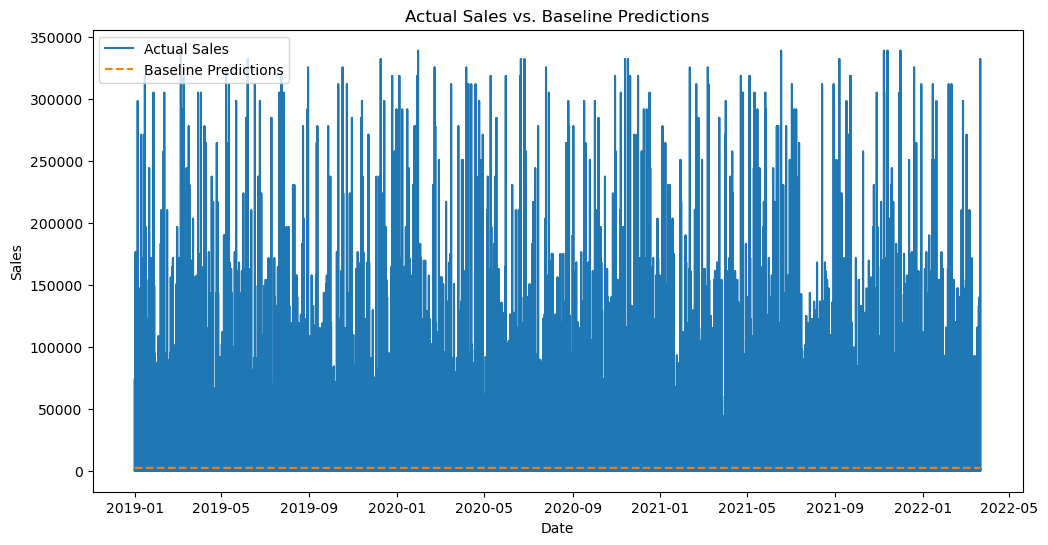

In [24]:

# Load actual sales data into a DataFrame 
df = pd.read_csv('actual_sales_data_train.csv')

# set 'date' column as the index for time-based analysis
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

# Calculate the mean of historical sales data
mean_sales = df['y'].mean()

# Create a DataFrame to hold baseline predictions
baseline_predictions = pd.DataFrame({'ds': df.index, 'baseline_sales': mean_sales})

# Calculate metrics for the baseline model
actual_values = df['y']
baseline_values = baseline_predictions['baseline_sales']

mae = mean_absolute_error(actual_values, baseline_values)
mse = mean_squared_error(actual_values, baseline_values)

print("Baseline Mean Absolute Error:", mae)
print("Baseline Mean Squared Error:", mse)

# Plot the actual sales data and baseline predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, actual_values, label='Actual Sales')
plt.plot(baseline_predictions['ds'], baseline_values, label='Baseline Predictions', linestyle='--')
plt.title('Actual Sales vs. Baseline Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Trained Model:

MAE: 2636.42
MSE: 55,712,688.56
    
Baseline Model:

MAE: 2827.80
MSE: 72,293,000.37

    
Summary:-
 
Both the MAE and MSE metrics show that the trained model outperforms the baseline model in terms of accuracy and predictive power. Therefore, the trained model is considered better based on these evaluation results.

###  Performance of Test dataset 

In [30]:
# Using sales data and order date for utilization in Google Colab with the Prophet model.

# Create a new DataFrame 'sales_data' with only 'order_date' and 'sales' columns using test data
sales_data = test_data[['order_date', 'sales']].copy()

# Specify the file path where to save the CSV file
file_path = 'sales_data_test.csv'

# Save the DataFrame to a CSV file
sales_data.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'Saved the sales_data to {file_path}')



Saved the sales_data to sales_data_test.csv


### Retrieving actual_sales_data_test.csv, forecast_sales_data_test.csv, and forecast_test_sales_data_test.csv from Google Colab in conjunction with the Prophet model.

In [31]:
# filename of CSV file
file_path = 'actual_sales_data_test.csv'

# Read the CSV file into a DataFrame
actual_sales_data_test_df = pd.read_csv(file_path)

Baseline Mean Absolute Error: 2835.9904224213597
Baseline Mean Squared Error: 72862459.34566556


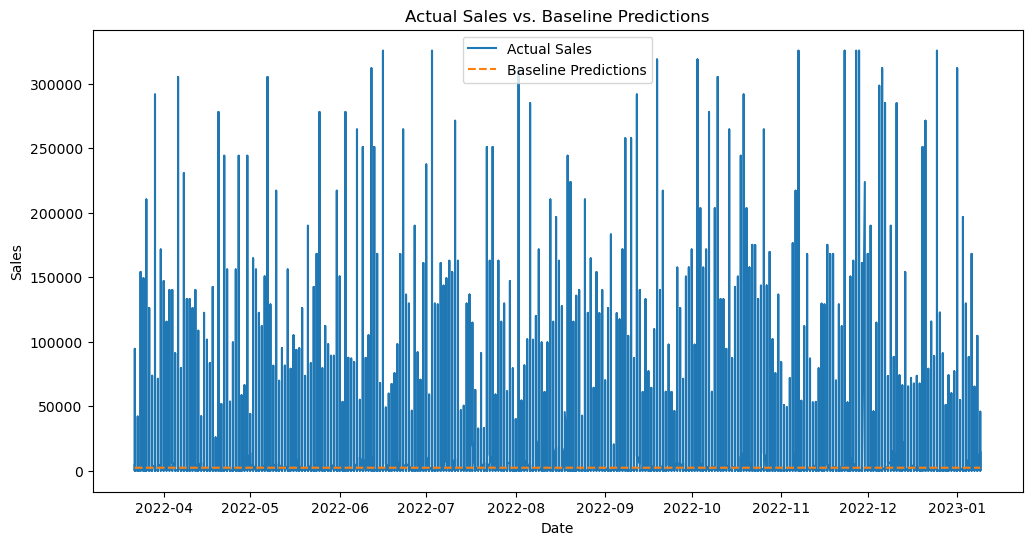

In [32]:
# Test data and baseline comparison:

# Load actual sales data into a DataFrame 
df = pd.read_csv('actual_sales_data_test.csv')

# set 'date' column as the index for time-based analysis
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

# Calculate the mean of historical sales data
mean_sales = df['y'].mean()

# Create a DataFrame to hold baseline predictions
baseline_predictions = pd.DataFrame({'ds': df.index, 'baseline_sales': mean_sales})

# Calculate metrics for the baseline model
actual_values = df['y']
baseline_values = baseline_predictions['baseline_sales']

mae = mean_absolute_error(actual_values, baseline_values)
mse = mean_squared_error(actual_values, baseline_values)

print("Baseline Mean Absolute Error:", mae)
print("Baseline Mean Squared Error:", mse)

# Plot the actual sales data and baseline predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, actual_values, label='Actual Sales')
plt.plot(baseline_predictions['ds'], baseline_values, label='Baseline Predictions', linestyle='--')
plt.title('Actual Sales vs. Baseline Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Summary:-
    
    The "Test Model" with a Mean Absolute Error (MAE) of approximately 2160.82 and a Mean Squared Error (MSE) of approximately 8,305,312.82 outperforms the "Baseline Model".

# SARIMA model

SARIMA (Seasonal Autoregressive Integrated Moving Average) can be effective when the data exhibits both seasonality and a stable or constant trend. SARIMA is a versatile time series forecasting model that is capable of handling various combinations of seasonality and trend components.



SARIMA is selected only when the data exhibits both seasonality and trend.
Our data is seasonal and has a relatively flat trend.

#  Data Exploration and Visualization:

In [64]:
# Find the minimum and maximum dates in the DataFrame
min_date = df_retail['order_date'].min()
max_date = df_retail['order_date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")


Minimum Date: 2019-01-01 00:00:00
Maximum Date: 2023-01-09 00:00:00


### The time period covered by the dataset January 1, 2019, to January 9, 2023

Text(0, 0.5, 'Sales')

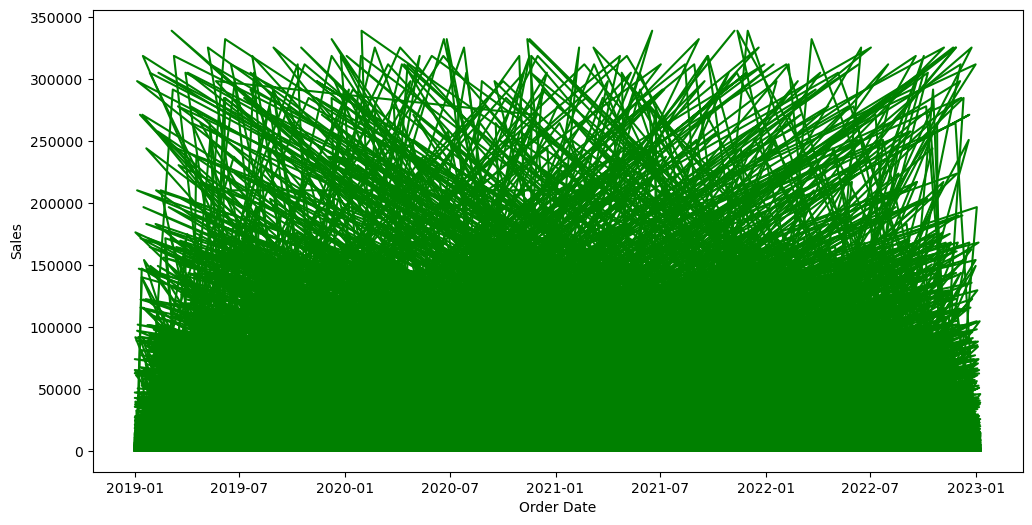

In [57]:
#Daily data
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to make 'order_date' a regular column
df_retail.reset_index(inplace=True)

# Select the 'order_date' and 'sales' columns
selected_columns = df_retail[['order_date', 'sales']]

# Display basic statistics of the 'sales' column
sales_summary = selected_columns['sales'].describe()

# Display the first few rows of the selected columns
first_few_rows = selected_columns.head()

# Create a time series plot of 'sales' over time
plt.figure(figsize=(12, 6))
plt.plot(selected_columns['order_date'], selected_columns['sales'], color='green')
plt.xlabel('Order Date')
plt.ylabel('Sales')


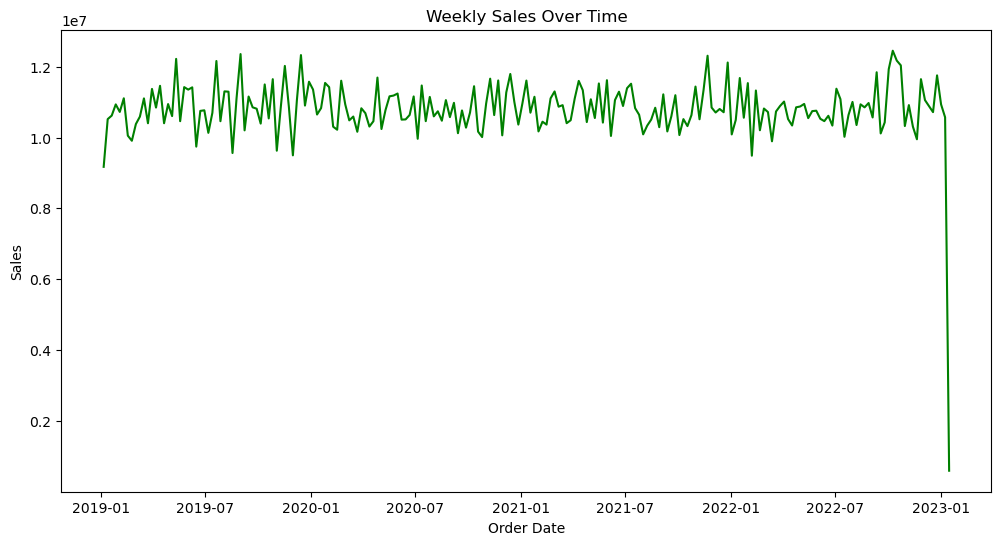

In [59]:
#Weekly data

import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to make 'order_date' a regular column
df_retail.reset_index(inplace=True)

# Select the 'order_date' and 'sales' columns
selected_columns = df_retail[['order_date', 'sales']]

# Resample the data to weekly frequency and sum the sales for each week
selected_columns = selected_columns.resample('W', on='order_date').sum()

# Create a time series plot of 'sales' over time
plt.figure(figsize=(12, 6))
plt.plot(selected_columns.index, selected_columns['sales'], color='green')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Over Time')
plt.show()


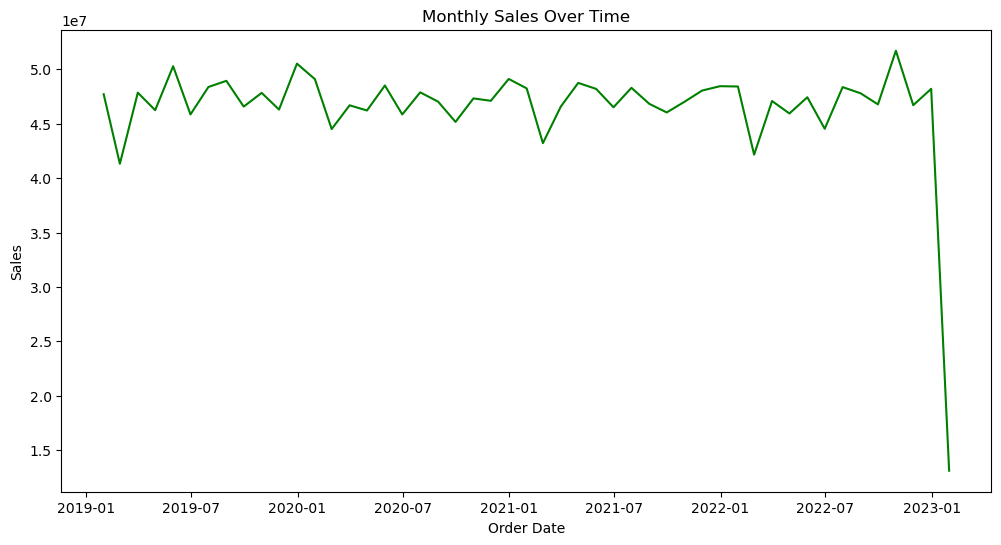

In [58]:
# Monthly data
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to make 'order_date' a regular column
df_retail.reset_index(inplace=True)

# Select the 'order_date' and 'sales' columns
selected_columns = df_retail[['order_date', 'sales']]

# Resample the data to monthly frequency and sum the sales for each month
selected_columns = selected_columns.resample('M', on='order_date').sum()

# Create a time series plot of 'sales' over time
plt.figure(figsize=(12, 6))
plt.plot(selected_columns.index, selected_columns['sales'], color='green')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.show()


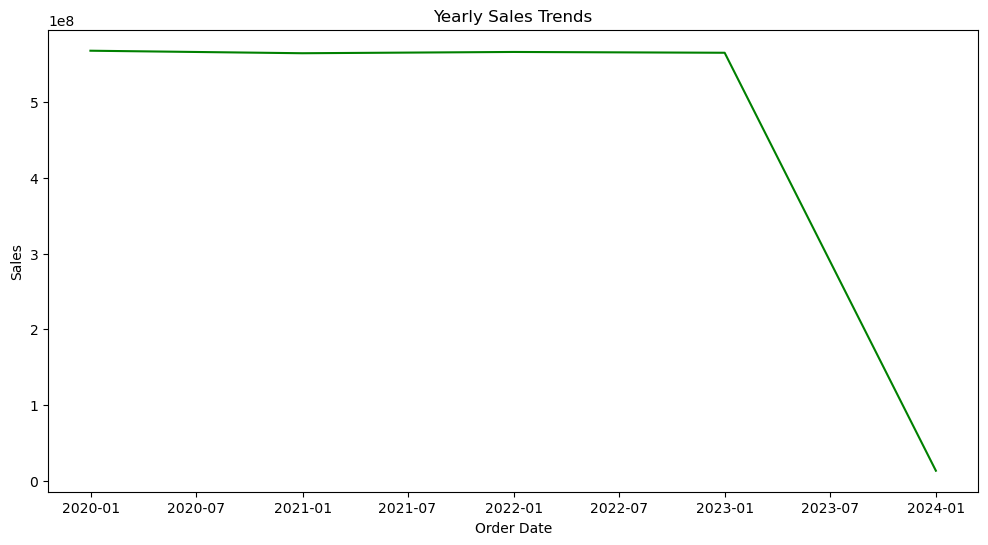

In [63]:
# Yearly data
# we have data from 2019-01 to 2023-01

import pandas as pd
import matplotlib.pyplot as plt

# Reset the index without adding level_0 as a regular column
df_retail.reset_index(drop=True, inplace=True)

# Select the 'order_date' and 'sales' columns
selected_columns = df_retail[['order_date', 'sales']]

# Resample the data to yearly frequency and sum the sales for each year
selected_columns = selected_columns.resample('Y', on='order_date').sum()

# Create a time series plot of 'sales' over time
plt.figure(figsize=(12, 6))
plt.plot(selected_columns.index, selected_columns['sales'], color='green')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Yearly Sales Trends')
plt.show()


#  Stationarity Check



In [ ]:
# Not using this with the entire dataset as kernal died due to lack of memory
# Perform Dickey-Fuller test for stationarity
#result = adfuller(df_retail['sales'])
#print('ADF Statistic:', result[0])
#print('p-value:', result[1])


In [17]:
# working with a subset of data (30 percent of the entire dataset as kernal died due to lack of memory)

# Calculate the number of rows for the subset (approximately 10%)
subset_size = int(0.30 * len(df_retail))

# Create a smaller subset by selecting the first 30% of rows
subset_df = df_retail.head(subset_size)

# Perform the Dickey-Fuller test on the 'sales' column of the subset
from statsmodels.tsa.stattools import adfuller
result = adfuller(subset_df['sales'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -535.6405154647475
p-value: 0.0


In summary:

A low ADF Statistic (far from zero) suggests stationarity.
A low p-value (typically < 0.05) suggests stationarity.

## These results are indicative of a stationary time series, which is a desirable property in  time series analyses as it simplifies modeling and forecasting

#  Initial Model Selection


Define initial values for hyperparameters p, d, q, P, D, Q, and s based on the stationarity check and prior knowledge.

## Selecting initial values for the hyperparameters of SARIMA model

## 1. Differencing Order (d and D):

Since the ADF test results indicate stationarity, we don't need any differencing (d = 0 and D = 0) for the non-seasonal and seasonal components. However, we can still verify this by examining the ACF and PACF plots.

# 1. 1. Generate ACF and PACF Plots:

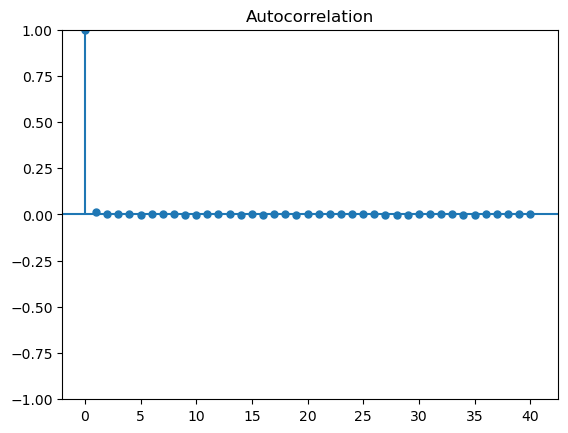

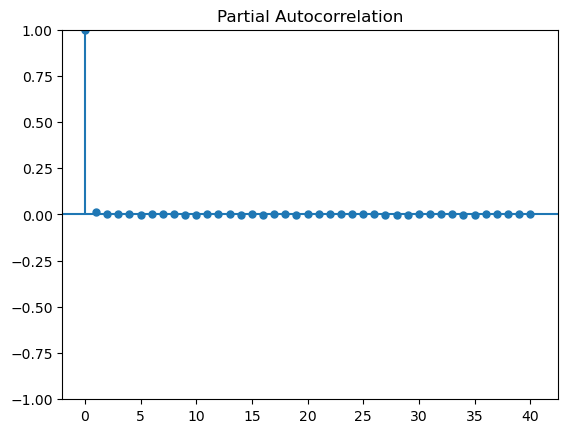

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df_retail['sales'], lags=40)
plt.show()

# Plot PACF
plot_pacf(df_retail['sales'], lags=40)
plt.show()


Both the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots look similar and exhibit a spike at lag 0 that extends vertically up to 1 on the y-axis while the rest of the points are on the center line, it suggests that the time series may not have strong autocorrelation or partial autocorrelation patterns at any significant lags.This pattern in the ACF and PACF plots is indicative of a stationary white noise or a random process with no specific AR (AutoRegressive) or MA (Moving Average) patterns. 

#  Grid Search or Automated Tuning



Use a grid search or automated tools like auto_arima from the pmdarima library to explore different hyperparameters and select the best model based on AIC or BIC.



# Split the data before modelling

In [21]:
#  Data Splitting
train_size = int(len(df_retail) * 0.8)
train_data = df_retail['sales'][:train_size]
test_data = df_retail['sales'][train_size:]

In [22]:
# After splitting the data it is a good practice to set 
# Reset the index and rename columns

train_data.index.name = 'order_date'
train_data = train_data.reset_index()
train_data.columns = ['order_date', 'sales']



# Model Fitting and Evaluation



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define SARIMA hyperparameters based on the selected values
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  # For monthly data with yearly seasonality



# Create and fit the SARIMA model
sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Make forecasts using the SARIMA model
forecast_steps = len(test_data)  # Forecast for the length of the test data
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)

# Print evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['order_date'], train_data['sales'], label='Actual Sales', color='blue')
plt.plot(test_data.index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07053D+01    |proj g|=  7.65148D-02

At iterate    5    f=  1.06315D+01    |proj g|=  4.70011D-02

At iterate   10    f=  1.06115D+01    |proj g|=  2.50026D-03

At iterate   15    f=  1.06090D+01    |proj g|=  8.17061D-03
  ys=-1.222E-01  -gs= 3.011E-03 BFGS update SKIPPED
  ys=-1.925E-04  -gs= 2.568E-05 BFGS update SKIPPED

At iterate   20    f=  1.06084D+01    |proj g|=  1.10284D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     94      2     2     0   3.690D-03   1.061D+01
  F =   10.608397297402556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


# ARIMA model

ARIMA (AutoRegressive Integrated Moving Average) models are widely used for forecasting time series data. They combine autoregressive (AR) and moving average (MA) components and can be effective for capturing trends and seasonality.

In [ ]:
General process for ARIMA model :
    Visualize the time series data
    Make the time series data stationary
    Plot the correlation and auto correlation charts
    Construct the ARIMA model or seasonal ARIMA based on the data
    Use the model to make predictions
    
Lets go through these steps!   

In [ ]:
ARIMA is selected only when the data is non- seasonal

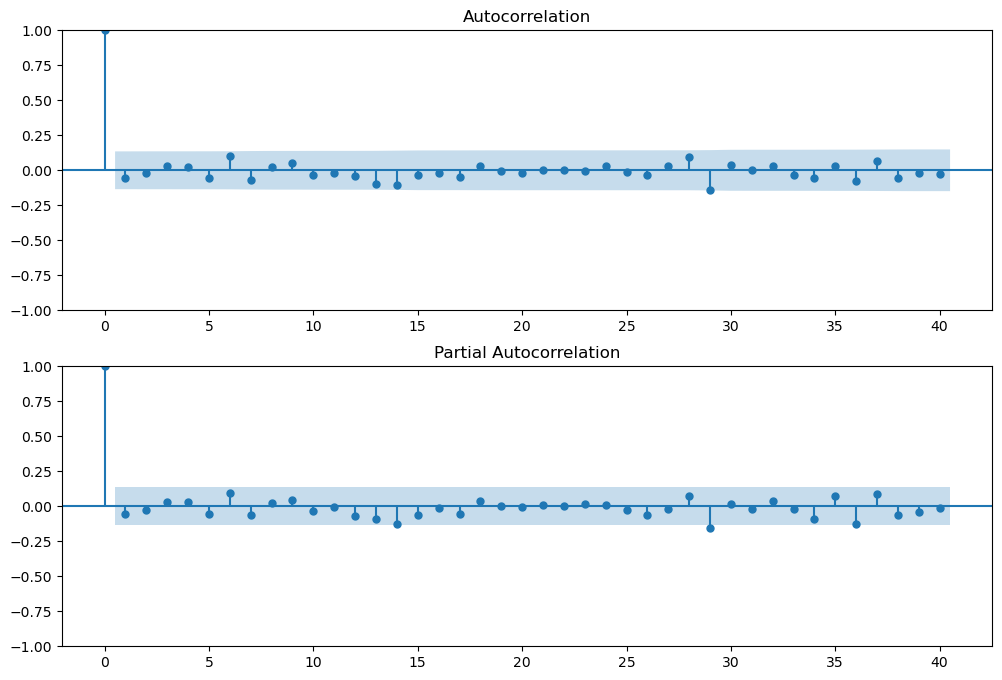

ADF Statistic: -15.019930262746149
p-value: 1.0258726036394906e-27
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  211
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1313.171
Date:                Wed, 04 Oct 2023   AIC                           2634.342
Time:                        14:12:10   BIC                           2647.749
Sample:                    01-06-2019   HQIC                          2639.762
                         - 01-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2325.5280      8.243    282.129      0.000    2309.372    2341.684
ar.L1          0.1168      1.145      0.102      0.919      -2.1

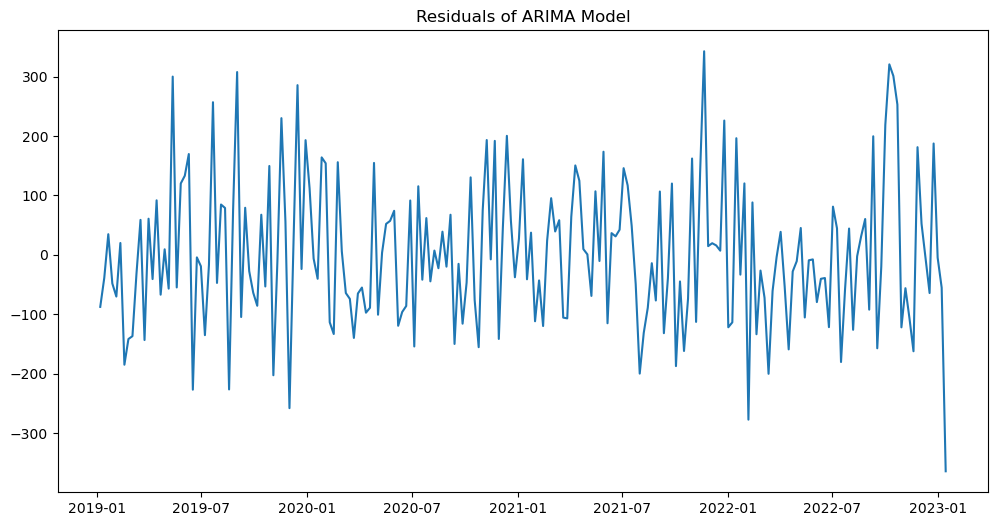

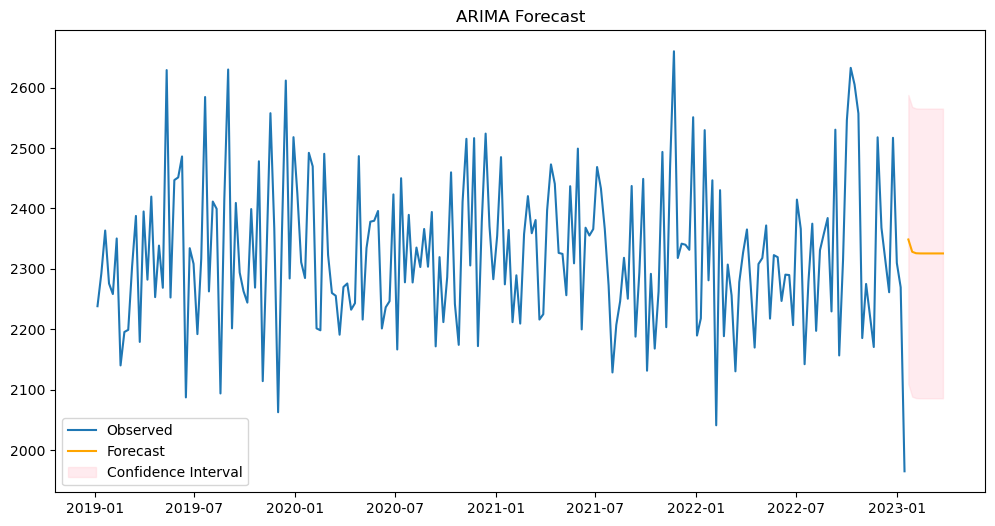

In [16]:
#Plot the ACF and PACF:
# Plot the ACF and PACF to determine the order of differencing and ARMA components
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(y, ax=ax1, lags=40)
plot_pacf(y, ax=ax2, lags=40)
plt.show()

#Dickey-Fuller Test:
# Perform a Dickey-Fuller test to check for stationarity
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#Determine ARMA Order (p, q):
# If the series is not stationary, apply differencing until it becomes stationary
d = 0  # Initial differencing order

while result[1] > 0.05:
    y = y.diff().dropna()  # Difference the series
    d += 1
    result = adfuller(y)
    print(f'Differencing order d={d}, ADF p-value: {result[1]}')

#  determine the order (p, q) for the ARMA model:
p = 1  # Autoregressive (AR) order
q = 1  # Moving Average (MA) order

#Fit the ARIMA Model:
# Fit the ARIMA model
model = ARIMA(y, order=(p, d, q))
results = model.fit()

# Print the model summary
print(results.summary())

# Visualize the model residuals:
plt.figure(figsize=(12, 6))
plt.plot(results.resid)
plt.title('Residuals of ARIMA Model')
plt.show()

# Make forecasts using the ARIMA model:
forecast_steps = 10  # Change this to the number of steps that needs to be forecasted
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(y, label='Observed')
plt.plot(forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- Explore --- Model ---<strong style="font-size: 18px; background-color: orange;">DELIVER</strong>
    </div>
</div>

### Model to deliver: Prophet

## Conclusion:
 
Trained Model:
MAE: 2636.42
MSE: 55,712,688.56
    
    
    
Baseline Model:
MAE: 2827.80
MSE: 72,293,000.37.               



Test Model:
Mean Absolute Error: 2160.821729290517
Mean Squared Error: 8305312.8198176725 



Summary:- The "Test Model" with a Mean Absolute Error (MAE) of approximately 2160.82 and a Mean Squared Error (MSE) of approximately 8,305,312.82 outperforms the "Baseline Model" and the "Trained Model" on both MAE and MSE, making it the best choice against the baseline.


 

## Acctionable Recommendations:

- Utilize the forecasts generated by the Prophet model to make informed decisions regarding inventory management, resource allocation, and marketing strategies.
 - Leverage the identified seasonal patterns to optimize sales promotions during peak periods.

## Next Steps:

 - Continuously monitor and update the Prophet model to adapt to changing market dynamics.
 - Explore the integration of external factors, such as economic indicators or competitive data, to enhance the accuracy of sales forecasts.
 - Collaborate with relevant stakeholders to implement data-driven strategies based on the model's insights.




